# Coffee Sales - Exploratory Data Analysis

In this analysis, we will see customer behavior by looking at spending patterns, drink preferences, and arrival times, based on the payment method. By exploring these details, we get a clearer picture of how cash and card users differ in their choices and habits, helping us understand trends that could be useful for targeted decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-sales/index.csv


## The Question
The Question will be:
1. What was the max, min,mean, and the standard deviation of purchase of people using card and cash
2. What are the most favourite drink for cash payer and card user to order?
3. What does the time distribution of order look like?
    * For the total customer
    * For the cash payer
    * For the card user
    
The first we need to do is to load the data.

In [2]:
coffee_df = pd.read_csv("/kaggle/input/coffee-sales/index.csv")

Let's see the sample

In [3]:
coffee_df.sample(10)

,date,datetime,cash_type,card,money,coffee_name
797,2024-06-16,2024-06-16 15:02:36.332,card,ANON-0000-0000-0304,32.82,Americano with Milk
1039,2024-07-25,2024-07-25 19:21:00.764,card,ANON-0000-0000-0257,32.82,Cappuccino
927,2024-07-06,2024-07-06 17:15:46.042,card,ANON-0000-0000-0009,32.82,Latte
587,2024-05-24,2024-05-24 22:30:40.198,card,ANON-0000-0000-0210,32.82,Americano with Milk
913,2024-07-03,2024-07-03 19:06:09.136,card,ANON-0000-0000-0009,37.72,Latte
1835,2024-10-08,2024-10-08 12:48:04.520,card,ANON-0000-0000-0225,25.96,Americano
1606,2024-09-19,2024-09-19 13:45:42.367,card,ANON-0000-0000-0640,23.02,Cortado
671,2024-06-01,2024-06-01 11:38:09.371,card,ANON-0000-0000-0250,37.72,Latte
371,2024-04-26,2024-04-26 10:12:50.618,card,ANON-0000-0000-0001,37.72,Latte
757,2024-06-11,2024-06-11 18:49:36.428,card,ANON-0000-0000-0285,37.72,Latte


Let's see how many null values we have.

In [4]:
coffee_df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

There are 89 null values. But, what are those null values in _card_ column?

In [5]:
coffee_df.sort_values('card')

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
718,2024-06-06,2024-06-06 10:36:09.667,card,ANON-0000-0000-0001,37.72,Latte
710,2024-06-05,2024-06-05 10:28:50.620,card,ANON-0000-0000-0001,37.72,Latte
686,2024-06-03,2024-06-03 10:12:04.141,card,ANON-0000-0000-0001,37.72,Latte
647,2024-05-30,2024-05-30 09:47:59.092,card,ANON-0000-0000-0001,37.72,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.00,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.00,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.00,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.00,Americano with Milk


It's likely that those null values is because it's the card number of cash payer, which is none.

In [6]:
coffee_df[coffee_df['cash_type']=='cash']['cash_type'].count()

89

Yup, the number of cash payer matches the number of null values we have. We can further verify it below

In [7]:
coffee_df[coffee_df['cash_type']=='cash'][['cash_type','card']].sample(89)

,cash_type,card
287,cash,NaN
220,cash,NaN
285,cash,NaN
105,cash,NaN
353,cash,NaN
...,...,...
588,cash,NaN
164,cash,NaN
442,cash,NaN
190,cash,NaN


Yes. It turns out that the null values is because they are card numbers for the customer that paid without card.

## Summary Statistics

In [8]:
coffee_df.describe()

,money
count,2026.000000
mean,31.670424
std,5.212254
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [9]:
coffee_df[['date','datetime','cash_type','card','coffee_name']].describe()

,date,datetime,cash_type,card,coffee_name
count,2026,2026,2026,1937,2026
unique,231,2026,2,792,8
top,2024-10-11,2024-03-01 10:15:50.520,card,ANON-0000-0000-0012,Americano with Milk
freq,26,1,1937,110,492


Based on this brief summary, we can tell that;
1. The most visited day was October 11th 2024 (per Oct. 28th 2024)
2. Customers tend to pay with card
3. The customer who visited the most is the person with card number 0012
4. Americano with Milk is the most ordered coffee in this coffee shop

### Changing Data Type
Now, let's change the data types of some columns to get better work

In [10]:
#checking the original types of the columns
coffee_df[['date','datetime']].dtypes

date        object
datetime    object
dtype: object

In [11]:
#changing the data type into Pandas datetime
coffee_df['date'] = pd.to_datetime(coffee_df['date'])
coffee_df['datetime'] = pd.to_datetime(coffee_df['datetime'])

In [12]:
coffee_df[['date','datetime']].dtypes

date        datetime64[ns]
datetime    datetime64[ns]
dtype: object

In [13]:
coffee_df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2021,2024-10-20,2024-10-20 21:14:18.045,card,ANON-0000-0000-0789,35.76,Hot Chocolate
2022,2024-10-20,2024-10-20 21:15:17.780,card,ANON-0000-0000-0790,25.96,Cortado
2023,2024-10-20,2024-10-20 21:17:26.865,card,ANON-0000-0000-0791,35.76,Cocoa
2024,2024-10-20,2024-10-20 21:25:00.085,card,ANON-0000-0000-0792,35.76,Latte


Now the _date_ and _datetime_ columns are in the correct data type

## Summary Statistics: Card vs Cash

In [14]:
# Grouping the data by payment method and aggregating the statistics
cashncard_df = coffee_df.groupby('cash_type')['money'].agg(['max','min','mean','std']).reset_index()
cashncard_df

,cash_type,max,min,mean,std
0,card,38.7,18.12,31.480785,5.147928
1,cash,40.0,24.00,35.797753,4.910980


### Visualizing the Data on Multiple Bar Charts

In [15]:
# Making it into long format as it is easier to use Grouped Bar Charts with Seaborn
cashncard_df = cashncard_df.melt(id_vars='cash_type', var_name='Statistic', value_name='Value')

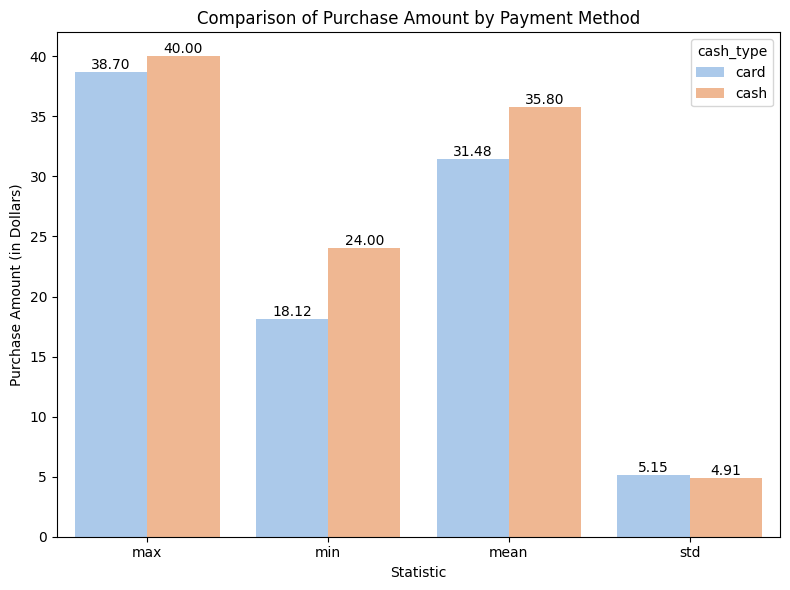

In [16]:
# Plot the grouped bar chart with Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=cashncard_df, x='Statistic', y='Value', hue='cash_type', palette='pastel')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Adding Title and Axis Labels
ax.set_title('Comparison of Purchase Amount by Payment Method')
ax.set_ylabel('Purchase Amount (in Dollars)')
ax.set_xlabel('Statistic')

plt.tight_layout()
plt.show()

Based on that chart we can say that the customers that paid using cash, on average, spent more than the customers that paid using card. Even the most amount of money that was spent by cash payers, and also the least amount spent, are higher than those of card users. And, by the lower standard deviation it has, we can also said that the cash group are more uniform than the card group. We can clarify it by looking it in box-and-whisker plot below.

### Visualizing on Box and Whisker Plot

Now, let's see the distribution of amount of the purchase by those two group in box and whisker plot, or simply box plot

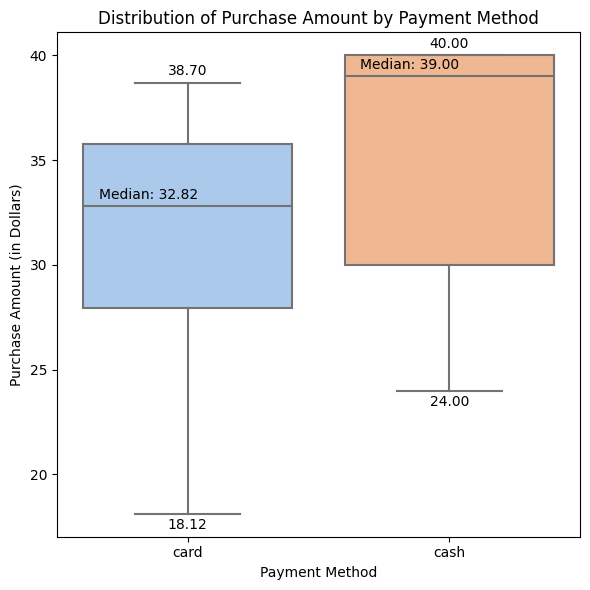

In [17]:
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=coffee_df, x='cash_type', y='money', palette='pastel')

# Adding annotations for each box's main summary statistics: median, min, and max
for i, payment_method in enumerate(coffee_df['cash_type'].unique()):
    median_val = coffee_df[coffee_df['cash_type'] == payment_method]['money'].median()
    max_val = coffee_df[coffee_df['cash_type'] == payment_method]['money'].max()
    min_val = coffee_df[coffee_df['cash_type'] == payment_method]['money'].min()
    
    # Annotate median
    ax.annotate(f'Median: {median_val:.2f}', 
                xy=(i, median_val), 
                xytext=(i - 0.15, median_val + 0.2),
                ha='center', va='bottom', color='black')
    
    # Annotate min and max
    ax.annotate(f'{min_val:.2f}', 
                xy=(i, min_val - 0.2), 
                ha='center', va='top', color='black')
    ax.annotate(f'{max_val:.2f}', 
                xy=(i, max_val + 0.2), 
                ha='center', va='bottom', color='black')
    
# Adding Title and Labeling the Axes
ax.set_title('Distribution of Purchase Amount by Payment Method')
ax.set_ylabel('Purchase Amount (in Dollars)')
ax.set_xlabel('Payment Method')

plt.tight_layout()
plt.show()

See, the _cash_ box has longer spread than those of _card_ box

## The Favourite Drink

Now let's see the top 3 favourites of those who paid with cash and with card

In [18]:
# Filtering only for only the card user
card_df = coffee_df[coffee_df['cash_type']=='card']

In [19]:
# Counting the values of the most ordered drink by the crad users
card_top3_df = card_df['coffee_name'].value_counts().head(3).reset_index()
card_top3_df

,coffee_name,count
0,Americano with Milk,477
1,Latte,448
2,Cappuccino,282


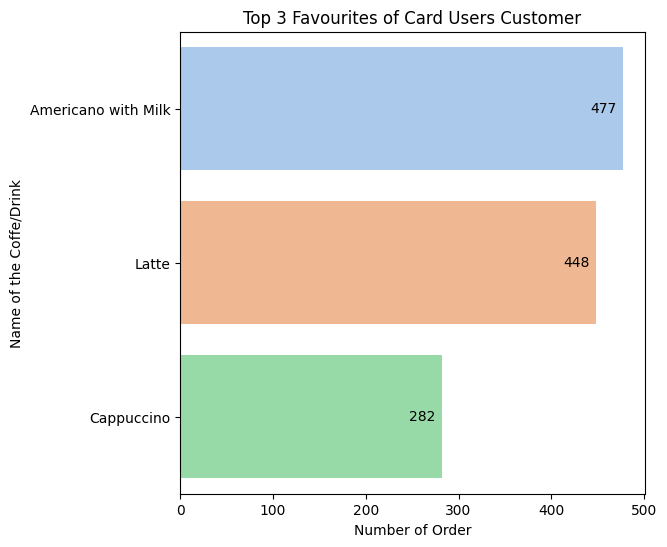

In [20]:
plt.figure(figsize=(6,6))
plots = sns.barplot(x='count', y='coffee_name', data=card_top3_df, palette='pastel')

plt.title("Top 3 Favourites of Card Users Customer")
plt.xlabel('Number of Order')
plt.ylabel('Name of the Coffe/Drink')

for index, value in enumerate(card_top3_df['count']):
    plt.text(value - 35, index, f'{value}', va='center')  # Adjusts position slightly to the right of each bar

plt.show();

_Americano with Milk_ is the the favourite drink for the card users. Let's see what the favourite coffee for the cash payers.

In [21]:
#Filtering and Counting like what we did with the card users
cash_df = coffee_df[coffee_df['cash_type']=='cash']

cash_top3_df = cash_df['coffee_name'].value_counts().head(3).reset_index()
cash_top3_df

,coffee_name,count
0,Latte,25
1,Americano with Milk,15
2,Cappuccino,15


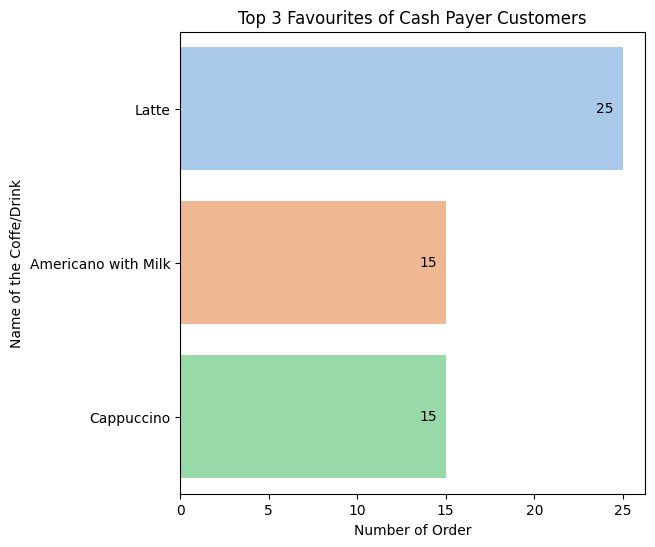

In [22]:
plt.figure(figsize=(6,6))
plots = sns.barplot(x='count', y='coffee_name', data=cash_top3_df, palette='pastel')

plt.title("Top 3 Favourites of Cash Payer Customers")
plt.xlabel('Number of Order')
plt.ylabel('Name of the Coffe/Drink')

for index, value in enumerate(cash_top3_df['count']):
    plt.text(value - 1.5, index, f'{value}', va='center')

plt.show();

It turns out that cash payers favour different drink from the card users. They prefer Latte to Americano with Milk

## Customer Arrival Time Distribution

Assuming customers arrived shortly before placing their order, we can see the time distribution of their arrivals. Firstly, we need to extract the hour portion from the _datetime_ column

In [23]:
coffee_df['hour_only'] = coffee_df['datetime'].dt.hour

In [24]:
# Ignoring deprecated use_inf_as_na future warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

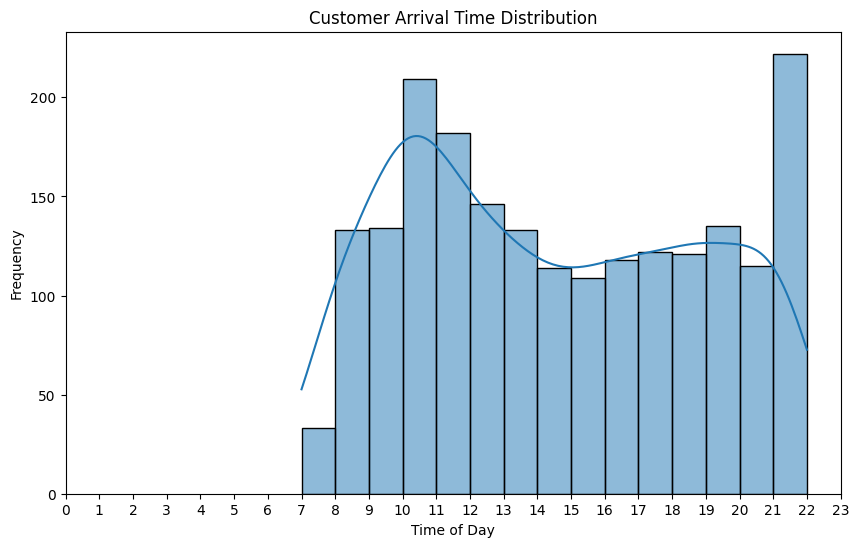

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(coffee_df['hour_only'], bins=15, kde=True)
plt.title("Customer Arrival Time Distribution")
plt.xlabel("Time of Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.show()

The chart above shows that peak customer arrivals occur between 9:00 PM and 10:00 PM, followed by a secondary peak from 10:00 AM to 11:00 AM.

Now let's see how the time distribution for the cash payer look like.

In [26]:
# Filtering the new dataframe that already has hour_only column
cash_arrival_df = coffee_df[coffee_df['cash_type']=='cash']

In [27]:
cash_arrival_df.head(5)

,date,datetime,cash_type,card,money,coffee_name,hour_only
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte,10
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte,10
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk,12
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte,10
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte,11


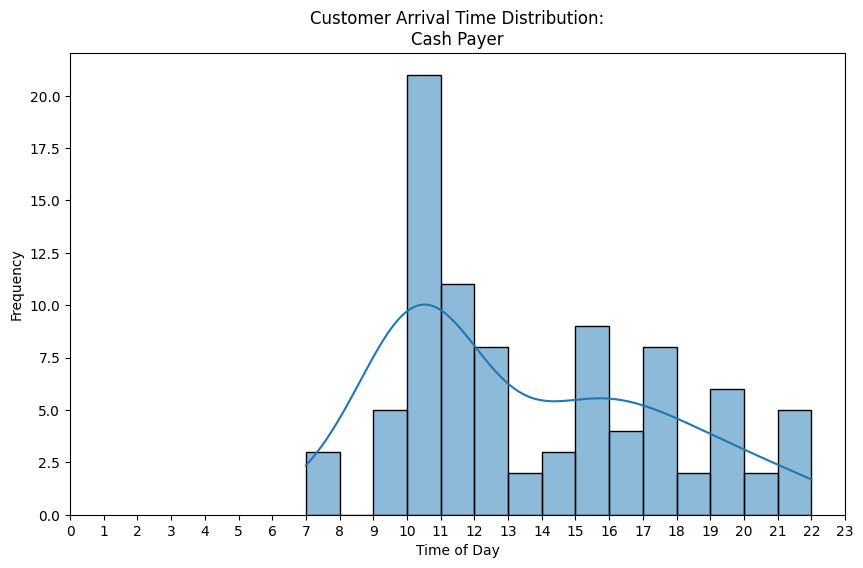

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(cash_arrival_df['hour_only'], bins=15, kde=True)
plt.title("Customer Arrival Time Distribution:\nCash Payer")
plt.xlabel("Time of Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.show()

It's interesting to see that while the peak customer arrivals as a whole occurs between 9:00 PM and 10:00 PM, the peak for cash payer occur between 10:00 AM and 11:00 AM.

We will see how the time distribution for card users look like below.

In [29]:
card_arrival_df = coffee_df[coffee_df['cash_type']=='card']

In [30]:
card_arrival_df.head(5)

,date,datetime,cash_type,card,money,coffee_name,hour_only
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13


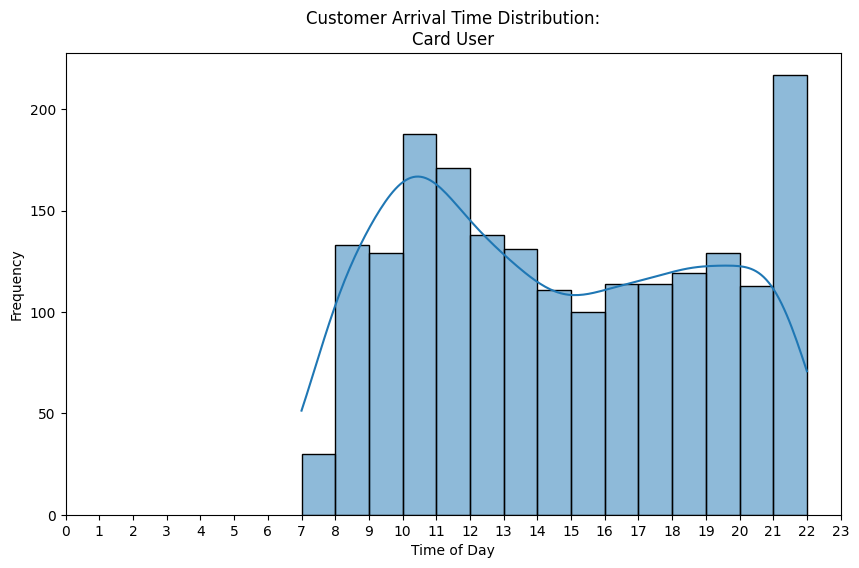

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(card_arrival_df['hour_only'], bins=15, kde=True)
plt.title("Customer Arrival Time Distribution:\nCard User")
plt.xlabel("Time of Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.show()

As the chart for the peak for overall customers suggests, the peak for card user, which is the majority of the customers, occurs between 9:00 PM and 10:00 PM.

## Conclusion

From our analysis, we can see that cash-paying customers tend to spend more on average than those paying by card, with both the highest and lowest cash spends being above those of card users. The cash group also shows more consistent spending, which we can spot by its lower standard deviation.

Interestingly, cash payers have different drink preferences too, while card users' top choice is _Americano with Milk_, cash payers'top choice is _Latte_.

Looking at arrival times, customer visits peak in the evening from 9:00 PM to 10:00 PM, with a second peak in the morning from 10:00 AM to 11:00 AM. Cash payers mostly show up around the morning peak, while card users—the majority—line up with the evening peak.

Overall, these patterns help us understand spending habits, preferences, and when customers are most likely to visit, giving us a clearer picture of customer behavior."